#  Analyzing the sentiments of the people from micro-blogging site / social media sites (Twitter)


### Dr. Abhay Bhadani
#### Sr. Director/Head (Data Science)
#### Yatra Online Ltd., Gurgaon
#### Ph.D. (IIT Delhi)



Emotions are expressed in nuanced ways, which varies by collective or individual experiences, knowledge, and beliefs. Therefore, to understand emotion, as conveyed through text, a robust mechanism capable of capturing and modeling different linguistic nuances and phenomena is needed. Emotions reflect different users’ perspectives towards actions and events, therefore they are innately expressed in dynamic linguistic forms.


Consider the social posts <B>“Thanks God for everything”</B> and <B>“Tnx mom for waaaaking me two hours early. Cant get asleep now”,</B> a lexicon-based model may not properly represent the emotion-relevant phrases: <I> “waaaaking me”, “Thanks God”, and “Tnx mom”. </I> First, the word “waaaaking” doesn’t exist in the English vocabulary, hence its referent may vary from its standard form, “waking”. Secondly, knowledge of the semantic similarity between the words <B>“Thanks” and “Tnx” </B> is needed to establish any relationship between the last two phrases. Even if such relationship can be established through knowledgebased techniques, it’s difficult to reliably determine the association of these phrases to a group of emotions. 


<B>Sentiment analysis is part of the Natural Language Processing (NLP).

<B> It is a type of text mining which aims to determine the opinion and subjectivity of its content. 
    
We can extract emotions related to some raw texts (e.g., reviews, comments, tweets). This is usually used on social media posts, customer reviews, customer queries, etc.  
    
Every customer facing industry (retail, telecom, finance, etc.) or political party or any such organizations are interested in identifying their customers’ sentiment, whether they think positive or negative, are they happy, sad, and so on about them.
    
Today, we shall perform a study to show how sentiment analysis can be performed using Python and how it can be deployed in production systems and host as an API.

![sen](./images/performing-twitter-sentiment-analysis1.jpg)

###  Dataset:

<!-- https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp -->

<B>Description

The data is in csv format. In computing, a comma-separated values (CSV) file stores tabular data (numbers and text) in plain text. Each line of the file is a data record. Each record consists of one or more fields, normally separated by commas. However, in this case the separator used in a semi-colon.


Here, we will aggregate Tweets based on sentiment. The aggregation process is based on the association of tweets with the same feelings, as well as the degree and proportion of the feeling.

The dataset consists of sentences that have been classified into the following categories: {'sadness', 'anger', 'love', 'surprise', 'fear', 'joy'}
    
    
List of documents with emotion flag, Dataset is split into train, test & validation for building the machine learning model

Example :-
    
    i feel like I am still looking at a blank canvas blank pieces of paper;sadness
    
    i cant walk into a shop anywhere where i do not feel uncomfortable;fear
    
    i felt anger when at the end of a telephone call;anger

    i never make her separate from me because i don t ever want her to feel like i m ashamed with her;sadness
    

The methodology used is based on building a classifier using different algorithms (such as recurrent neural network) that is capable of analyzing sentiment, using a data set that includes a number of emotions.

     
    
 

### Data Pre-Processing
![pre](https://www.electronicsmedia.info/wp-content/uploads/2017/12/Data-Preprocessing.jpg)

   
<B> Approach
    
Text Cleaning Steps:
    
    1) Clean the data
        Removing Twitter Handles (@user), Punctuations, Numbers, and Special Characters, Stop Words,
        Removing Short Words
    
    2) Perform Tokenization:  
            Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.
    
![vis](./images/tokenization.png)
    
    3) Stemming:
            Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word. For example, For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”
    
![vis](./images/stemming.jpeg)
    
    4) Visualization the Tweets using WordCloud:
            A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.


![vis](./images/word-cloud-sample.png)
    

The next stage involves using the trained model to sort tweets based on sentiment with a rating ratio.
    


In this partial stage, we will follow two methodologies: 
    
    The first is to draw a graph that shows the percentage of each of the feelings of the tweeters within Twitter regarding what is happening in the state of Sri Lanka.
    
    The next partial stage, is to move to the study of each of these feelings for the tweeters, and try to collect them in order to determine the degree of feelings for each of them.
    
    The final hierarchical schemas (for each one of the feelings) will show the correlation of the tweeters in terms of the degree of affiliation with that feeling.
    
The Euclidean distance will be used to calculate the degree of convergence for a single feeling (depending on the percentage of tweeting classification and belonging to a specific feeling).

### Representation of Words as Vectors

There are various ways to represent words in Vector Format.
    Bag-Of-Words
    
    Term Frequecy - Inverse Document Frequecy (TF-IDF)
    
    Word2Vec (Skip-Gram and CBOW)
    
    GloVe: GloVe stands for Global Vectors for word representation.
  
   
    Fast-Text: FastText was introduced by Facebook back in 2016. The idea behind FastText is very similar to Word2Vec. However, there was still one thing that methods like Word2Vec and GloVe lacked. Even though both of these models have been trained on billions of words, that still means our vocabulary is limited. FastText improved over other methods because of its capability of generalization to unknown words, which had been missing all along in the other methods.
    
    Bidirectional Encoder Representations from Transformers (BERT): BERT is a transformer-based architecture. Transformer uses a self-attention mechanism, which is suitable for language understanding. BERT is a multi-layered encoder. 
        
        BERT base – 12 layers, 12 attention heads, and 110 million parameters. 
        
        BERT Large – 24 layers, 16 attention heads and, 340 million parameters.


    
    Sentence - Encoders


<B>Vectorization</B> is jargon for a classic approach of converting input data from its raw format (i.e. text ) into vectors of real numbers which is the format that ML models support. This approach has been there ever since computers were first built, it has worked wonderfully across various domains, and it’s now used in NLP.


Download a pretrained vector representation of the words. 
These pre-trained vectors have been trained using GloVe embedding technique.

![viz](./images/GloVe_Representation.png)

In [1]:
!pwd

/home/abhay/experiments/Tutorials/src


In [2]:
#!wget https://nlp.stanford.edu/data/glove.6B.zip

In [3]:
#!unzip glove.6B.zip

In [4]:
# import opendatasets as op

In [5]:
# dataset_emotion = "emotions-dataset-for-nlp"

#### Install and import relevant python Packages:

In [6]:
# !pip install sklearn seaborn matplotlib tensorflow keras nltk flask requests 

In [7]:
import pandas as pd
import os
import numpy as np
import tensorflow as tf
import keras
import nltk
import string
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Embedding, LSTM ,Conv2D, Dense,GlobalAveragePooling1D,Flatten, Dropout , GRU, TimeDistributed, Conv1D, MaxPool1D, MaxPool2D
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import matplotlib as mpl

2022-09-06 14:19:42.223807: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-06 14:19:42.223836: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### First Step:

Building a classifier model  capable of analyzing emotions, using a dataset that includes a number of emotions.

Refer https://colah.github.io/posts/2015-08-Understanding-LSTMs/   for a detailed explanation of LSTM and RNN

### RNN (Recurrent Neural Network)


Humans don’t start their thinking from scratch every second. As you read this essay, you understand each word based on your understanding of previous words. You don’t throw everything away and start thinking from scratch again. Your thoughts have persistence.

Traditional neural networks can’t do this, and it seems like a major shortcoming. For example, imagine you want to classify what kind of event is happening at every point in a movie. It’s unclear how a traditional neural network could use its reasoning about previous events in the film to inform later ones.

Recurrent neural networks address this issue. They are networks with loops in them, allowing information to persist.

![viz](./images/RNN-unrolled.png)
        <B>An unrolled recurrent neural network. </B>


Advantages and Shortcomings Of RNNs

RNNs have various advantages such as:

    Ability to handle sequence data.
    Ability to handle inputs of varying lengths.
    Ability to store or ‘memorize’ historical information.

The disadvantages are:

    The computation can be very slow.
    The network does not take into account future inputs to make decisions.
    Vanishing gradient problem, where the gradients used to compute the weight update may get very close to zero preventing the network from learning new weights. The deeper the network, the more pronounced is this problem.

![viz](./images/LSTM2-notation.png)
 
 
![viz](./images/LSTM3-SimpleRNN.png)
    <B>The repeating module in a standard RNN contains a single layer. </B>




In [8]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')
porter = PorterStemmer()
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /home/abhay/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
class Emotion:
  def __init__(self, datasetFolder, batch_size, validation_split, optimizer, loss, epochs):
    self.datasetFolder = datasetFolder
    self.batch_size = batch_size
    self.validation_split = validation_split
    self.optimizer = optimizer
    self.loss = loss
    self.epochs = epochs
  def readDatasetCSV(self):
    trainDataset = pd.read_csv(os.path.join(self.datasetFolder, "data/train.txt"), names=['Text', 'Emotion'], sep=';')
    testDataset = pd.read_csv(os.path.join(self.datasetFolder, "data/test.txt"), names=['Text', 'Emotion'], sep=';')
    validDataset = pd.read_csv(os.path.join(self.datasetFolder, "data/val.txt"), names=['Text', 'Emotion'], sep=';')
    list_dataset = [trainDataset, testDataset, validDataset]
    self.dataset = pd.concat(list_dataset)
  def FeaturesLables(self):
    self.features = self.dataset['Text']
    self.labels = self.dataset['Emotion']  
  def splitDataset(self):
    self.X_train, self.X_test, self.Y_train, self.Y_test = train_test_split(self.features,
                                                                            self.labels, 
                                                                            test_size = self.validation_split)
  def CleanFeatures(self):
    self.features = self.features.apply(lambda sequence:
                                              [ltrs.lower() for ltrs in sequence if ltrs not in string.punctuation])
    self.features = self.features.apply(lambda wrd: ''.join(wrd))
  def tokenizerDataset(self):
    self.tokenizer = Tokenizer(num_words=5000)
    self.tokenizer.fit_on_texts(self.features)
    train = self.tokenizer.texts_to_sequences(self.features)
    self.features = pad_sequences(train)
    le = LabelEncoder()
    self.labels = le.fit_transform(self.labels)
    self.vocabulary = len(self.tokenizer.word_index)
  def label_categorical(self):
    self.labels = to_categorical(self.labels, 6)
  def glove_word_embedding(self, file_name):
    self.embeddings_index = {}
    file_ = open(file_name)
    for line in file_:
        arr = line.split()
        single_word = arr[0]
        w = np.asarray(arr[1:],dtype='float32')
        self.embeddings_index[single_word] = w
    file_.close()
    max_words = self.vocabulary + 1
    word_index = self.tokenizer.word_index
    self.embedding_matrix = np.zeros((max_words,300)).astype(object)
    for word , i in word_index.items():
            embedding_vector = self.embeddings_index.get(word)
            if embedding_vector is not None:
                self.embedding_matrix[i] = embedding_vector  
  def model(self):
    m = Sequential()
    m.add(Input(shape=(self.features.shape[1], )))
    m.add(Embedding(self.vocabulary + 1,300))
    m.add(GRU(128, recurrent_dropout=0.3, return_sequences=False, activity_regularizer = tf.keras.regularizers.L2(0.0001)))
    m.add(Dense(6, activation="softmax", activity_regularizer = tf.keras.regularizers.L2(0.0001)))
    self.m = m
  def compiler(self):
    self.m.compile(loss= self.loss,optimizer=self.optimizer,metrics=['accuracy'])
  def fit(self):
    earlyStopping = EarlyStopping(monitor = 'loss', patience = 20, mode = 'min', restore_best_weights = True)
    self.history_training = self.m.fit(self.X_train, self.Y_train, epochs= self.epochs,batch_size = self.batch_size,
                                       callbacks=[ earlyStopping])   
    
  def save_model(self, model_file='./models/model.json'):
    # serialize model to JSON
    model_json = self.m.to_json()
    with open(model_file, "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
        self.m.save_weights(model_file+".h5")
    print("Saved model to disk")

In [10]:
epochs = 100


In [11]:
dataset_emotion = "."
emotion = Emotion(dataset_emotion, 256, 0.1, 'adam', 'categorical_crossentropy', epochs)

In [12]:
emotion.readDatasetCSV()

In [13]:
emotion.dataset.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [14]:
emotion.FeaturesLables()

In [15]:
emotion.CleanFeatures()

In [16]:
emotion.features.head()

0                              i didnt feel humiliated
1    i can go from feeling so hopeless to so damned...
2     im grabbing a minute to post i feel greedy wrong
3    i am ever feeling nostalgic about the fireplac...
4                                 i am feeling grouchy
Name: Text, dtype: object

In [17]:
emotion.labels.unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [18]:
emotion.tokenizerDataset()

In [19]:
emotion.features

array([[   0,    0,    0, ...,  138,    2,  625],
       [   0,    0,    0, ...,    3,   21, 1383],
       [   0,    0,    0, ...,    2,  495,  420],
       ...,
       [   0,    0,    0, ...,    5,  215,  191],
       [   0,    0,    0, ...,   30,   57, 2181],
       [   0,    0,    0, ...,   75,    5,   70]], dtype=int32)

In [20]:
emotion.labels

array([4, 4, 0, ..., 2, 2, 2])

In [21]:
emotion.features.shape

(20000, 63)

In [22]:
emotion.features.shape

(20000, 63)

In [23]:
emotion.label_categorical()

In [24]:
emotion.labels

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

In [25]:
emotion.splitDataset()

In [26]:
emotion.glove_word_embedding("./pre-trained-embeddings/glove.6B.300d.txt")

In [27]:
emotion.model()
emotion.m.layers[0].set_weights([emotion.embedding_matrix])
emotion.m.layers[0].trainable = False

2022-09-06 14:20:09.220150: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-06 14:20:09.220182: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-06 14:20:09.220212: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (abhay-Latitude-E5570): /proc/driver/nvidia/version does not exist
2022-09-06 14:20:09.220743: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [28]:
emotion.compiler()

In [29]:
emotion.m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 63, 300)           5129100   
                                                                 
 gru (GRU)                   (None, 128)               165120    
                                                                 
 dense (Dense)               (None, 6)                 774       
                                                                 
Total params: 5,294,994
Trainable params: 165,894
Non-trainable params: 5,129,100
_________________________________________________________________


In [30]:
emotion.fit()

Epoch 1/100
71/71 [==============================] - 16s 197ms/step - loss: 1.3546 - accuracy: 0.4977
Epoch 2/100
71/71 [==============================] - 14s 198ms/step - loss: 0.7668 - accuracy: 0.7354
Epoch 3/100
71/71 [==============================] - 14s 195ms/step - loss: 0.4180 - accuracy: 0.8557
Epoch 4/100
71/71 [==============================] - 14s 197ms/step - loss: 0.2851 - accuracy: 0.8987
Epoch 5/100
71/71 [==============================] - 14s 197ms/step - loss: 0.2196 - accuracy: 0.9166
Epoch 6/100
71/71 [==============================] - 14s 198ms/step - loss: 0.1768 - accuracy: 0.9288
Epoch 7/100
71/71 [==============================] - 14s 198ms/step - loss: 0.1527 - accuracy: 0.9385
Epoch 8/100
71/71 [==============================] - 14s 198ms/step - loss: 0.1346 - accuracy: 0.9441
Epoch 9/100
71/71 [==============================] - 14s 201ms/step - loss: 0.1198 - accuracy: 0.9506
Epoch 10/100
71/71 [==============================] - 15s 209ms/step - loss: 0.110

71/71 [==============================] - 18s 259ms/step - loss: 0.0132 - accuracy: 0.9964
Epoch 81/100
71/71 [==============================] - 16s 219ms/step - loss: 0.0125 - accuracy: 0.9964
Epoch 82/100
71/71 [==============================] - 17s 241ms/step - loss: 0.0135 - accuracy: 0.9965
Epoch 83/100
71/71 [==============================] - 16s 229ms/step - loss: 0.0133 - accuracy: 0.9963
Epoch 84/100
71/71 [==============================] - 17s 240ms/step - loss: 0.0133 - accuracy: 0.9964
Epoch 85/100
71/71 [==============================] - 16s 221ms/step - loss: 0.0131 - accuracy: 0.9966
Epoch 86/100
71/71 [==============================] - 15s 204ms/step - loss: 0.0118 - accuracy: 0.9967
Epoch 87/100
71/71 [==============================] - 14s 196ms/step - loss: 0.0121 - accuracy: 0.9968
Epoch 88/100
71/71 [==============================] - 13s 190ms/step - loss: 0.0128 - accuracy: 0.9962
Epoch 89/100
71/71 [==============================] - 14s 193ms/step - loss: 0.0133 - 

In [31]:
emotion.save_model('./models/test.json')
 


Saved model to disk


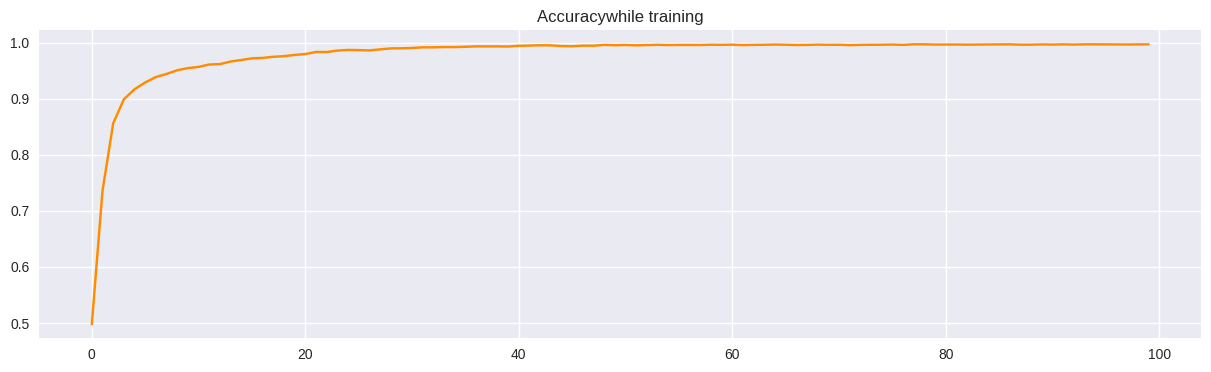

In [32]:
import matplotlib.pyplot as plt
mpl.style.use('seaborn')
figure = plt.figure(figsize=(15, 4))
plt.plot(emotion.history_training.history['accuracy'], 'darkorange', label = 'Accuracy')
plt.title("Accuracywhile training")
plt.show()

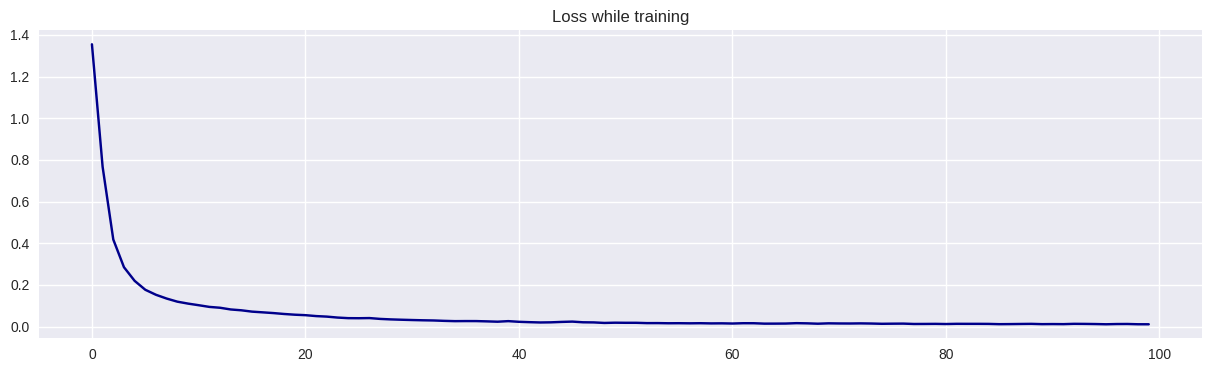

In [33]:
figure = plt.figure(figsize=(15, 4))
plt.plot(emotion.history_training.history['loss'], 'darkblue', label = 'Loss')
plt.title("Loss while training")
plt.show()

In [34]:
emotion.m.evaluate(emotion.X_test, emotion.Y_test, batch_size = 256)

8/8 [==============================] - 1s 60ms/step - loss: 0.2735 - accuracy: 0.9330


[0.2734626233577728, 0.9330000281333923]

In [35]:
y_pred = emotion.m.predict(emotion.X_test)

63/63 [==============================] - 1s 16ms/step


In [36]:
y_pred = np.argmax(y_pred, axis = 1)

In [37]:
y_pred

array([1, 3, 4, ..., 2, 4, 4])

In [38]:
y_test = np.argmax(emotion.Y_test, axis = 1)

In [39]:
y_test

array([1, 3, 4, ..., 2, 4, 4])

In [40]:
from sklearn.metrics import accuracy_score as acc
print(acc(y_pred, y_test))

0.933


In [41]:
res = tf.math.confusion_matrix(y_pred,y_test).numpy()

In [42]:
cm = pd.DataFrame(res,
                     index = ['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'], 
                     columns = ['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'])
cm

,sadness,anger,love,surprise,fear,joy
sadness,252,4,3,1,5,0
anger,7,213,0,0,4,8
love,4,3,619,17,4,8
surprise,1,0,32,138,0,0
fear,9,4,4,1,584,0
joy,1,9,5,0,0,60


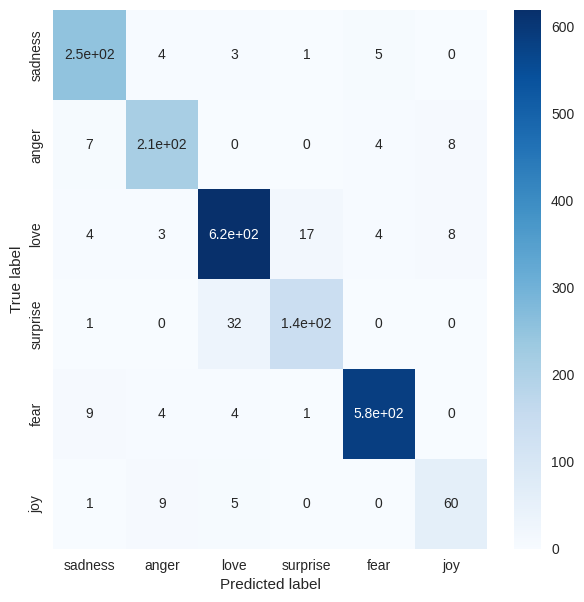

In [43]:
import seaborn as sns
figure = plt.figure(figsize=(7, 7))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Building additional classifiers

In [44]:
trainDataset = pd.read_csv("data/train.txt", names=['Text', 'Emotion'], sep=';')
testDataset = pd.read_csv("data/test.txt", names=['Text', 'Emotion'], sep=';')
validDataset = pd.read_csv("data/val.txt", names=['Text', 'Emotion'], sep=';')

trainDataset.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [45]:
list_dataset = [trainDataset, testDataset, validDataset]
dataset = pd.concat(list_dataset)
dataset.shape


(20000, 2)

In [46]:
tweet = dataset['Text']
labels = dataset['Emotion']
sentiment_label = dataset.Emotion.factorize()


In [47]:
tweet[:5]

0                              i didnt feel humiliated
1    i can go from feeling so hopeless to so damned...
2     im grabbing a minute to post i feel greedy wrong
3    i am ever feeling nostalgic about the fireplac...
4                                 i am feeling grouchy
Name: Text, dtype: object

In [50]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet)

tokenizer.document_count

20000

# Clount Vectorizer (Term-Frequency)
#### In this case, we demonstrate how we can compute the overall sentiments in number format so that we can comprehend it comfortably

In [51]:
import nltk
# nltk.download('wordnet')

nltk.stem.WordNetLemmatizer().lemmatize('word')
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

dataset['tweets_lemmatized'] = dataset.Text.apply(lemmatize_text).str.join(" ")
dataset.head()



,Text,Emotion,tweets_lemmatized
0,i didnt feel humiliated,sadness,i didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,sadness,i can go from feeling so hopeless to so damned...
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing a minute to post i feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,i am ever feeling nostalgic about the fireplac...
4,i am feeling grouchy,anger,i am feeling grouchy


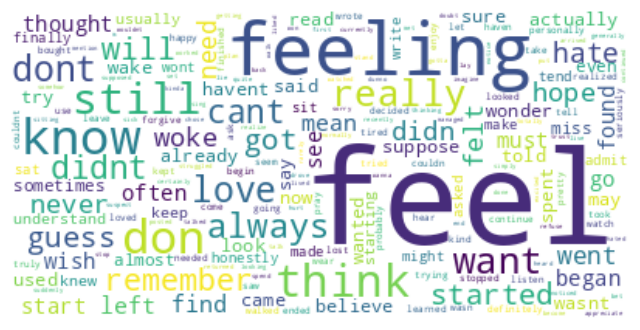

In [52]:
from wordcloud import WordCloud

#Creating the text variable
text = " ".join(cat.split()[1] for cat in dataset.Text)
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
docs = list(dataset.tweets_lemmatized)
X = vec.fit_transform(docs)

In [54]:
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
df.head()

/home/abhay/experiments/Tutorials/venv39/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aaaaaaand,aaaaand,aaaah,aaaand,aac,aahhh,aaron,ab,abandon,...,zoned,zonisamide,zoo,zoom,zooming,zq,zucchini,zum,zumba,zz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
# Create a Counter of tokens
count_vectorizer = CountVectorizer(decode_error='ignore', lowercase=True, min_df=5)
# Apply it on the train data to get the vocabulary and the mapping. This vocab and mapping is then applied to the test set.
# Before, we convert to Unicode to avoid issues with CountVectorizer
train = count_vectorizer.fit_transform(dataset.tweets_lemmatized.astype('U'))
train.shape

(20000, 3733)

In [56]:
# Extract the vocabulary as a list of (word, frequency)
vocab = list(count_vectorizer.vocabulary_.items())
print(vocab[:10])

[('didnt', 888), ('feel', 1227), ('humiliated', 1627), ('can', 471), ('go', 1406), ('from', 1339), ('feeling', 1229), ('so', 2993), ('hopeless', 1601), ('to', 3336)]


In [57]:
total_pos_count = 0
total_neg_count = 0
pos_count_vector = []
neg_count_vector = []

size = len(dataset.tweets_lemmatized)
size

20000

In [58]:
positive_lexicon = pd.read_csv("./data/positive-lexicon.txt", usecols=[0], names=['positive'], header=None)

print(positive_lexicon.shape)

negative_lexicon = pd.read_csv("./data/negative-lexicon.txt", encoding='ISO-8859-1', usecols=[0], names=['negative'], header=None)
print(negative_lexicon.shape)

(2006, 1)
(4783, 1)


In [59]:
positive_lexicon.head()

,positive
0,a+
1,abound
2,abounds
3,abundance
4,abundant


In [60]:
negative_lexicon.head()

,negative
0,2-faced
1,2-faces
2,abnormal
3,abolish
4,abominable


In [61]:

for i in range(1,size):
# for i in range(0,4):
    corpus_words = list(dataset.iloc[i].tweets_lemmatized.split(" "))
#     print(i)

    pos_count = len((set(corpus_words).intersection(set(positive_lexicon.positive))))
#     print(pos_count)
    neg_count = len((set(corpus_words).intersection(set(negative_lexicon.negative))))
#     print(neg_count)
#     if(pos_count>neg_count):
#         print("It's a positive review")
#     else:
#         print("It's a negative review")
    
    total_count_for_current_review = pos_count + neg_count+1 ## current positive and negative count
    pos_percentage = (pos_count*100)/total_count_for_current_review
    neg_percentage = (neg_count*100)/total_count_for_current_review
#     print(pos_percentage)
    ## current positive percentage
#     print(neg_percentage)
    ## current negtive percentage
    total_pos_count = total_pos_count + pos_count ## overall positive count
    total_neg_count = total_neg_count + neg_count ## overall negative count
    pos_count_vector.append(pos_count) 
    neg_count_vector.append(neg_count)

    
    
print("Positive Percentage = ", pos_percentage)
print("Negative Percentage = ", neg_percentage)



Positive Percentage =  66.66666666666667
Negative Percentage =  0.0


In [62]:
print('Total Positive Count: ',total_pos_count )
print('Total Negative Count: ',total_neg_count )

Total Positive Count:  19632
Total Negative Count:  18350


In [63]:
counts = pd.DataFrame(list(zip(pos_count_vector, neg_count_vector)), columns = ["positive_count","negative_count"])
counts.head()

,positive_count,negative_count
0,1,2
1,0,2
2,0,0
3,0,1
4,0,0


In [64]:
counts['sentiment_score'] = (counts.positive_count-counts.negative_count) / (counts.positive_count+counts.negative_count+1)

In [65]:
counts.head()

,positive_count,negative_count,sentiment_score
0,1,2,-0.250000
1,0,2,-0.666667
2,0,0,0.000000
3,0,1,-0.500000
4,0,0,0.000000


In [66]:
dataset.iloc[0].Text

'i didnt feel humiliated'

In [67]:
total_count = total_pos_count + total_neg_count
overall_positive_percentage = (total_pos_count*100)/total_count
overall_negative_percentage = (total_neg_count*100)/total_count


In [68]:
overall_positive_percentage, overall_negative_percentage

(51.687641514401555, 48.312358485598445)

([<matplotlib.patches.Wedge at 0x7fbcec3db640>,
 [Text(-0.05829333072613106, 1.0984543174810932, 'POSITIVE'),
  Text(0.05829333072613118, -1.0984543174810932, 'NEGATIVE')])

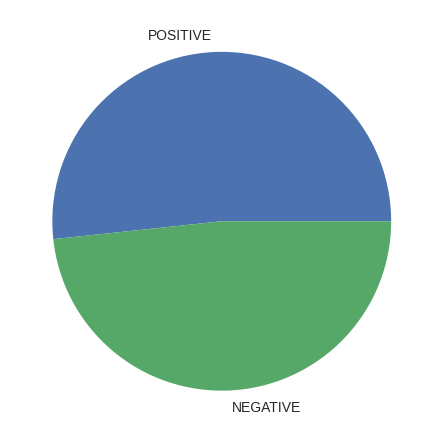

In [69]:
plt.pie([overall_positive_percentage, overall_negative_percentage], labels = ["POSITIVE","NEGATIVE"])


## Building a Classifier using LSTM

Long Short-Term Memory (LSTM) networks are a type of recurrent neural network capable of learning order dependence in sequence prediction problems.

This is a behavior required in complex problem domains like machine translation, speech recognition, and more.

LSTMs are a complex area of deep learning. It can be hard to get your hands around what LSTMs are, and how terms like bidirectional and sequence-to-sequence relate to the field.

<I>
    The Long Short Term Memory architecture was motivated by an analysis of error flow in existing RNNs which found that long time lags were inaccessible to existing architectures, because backpropagated error either blows up or decays exponentially.

    An LSTM layer consists of a set of recurrently connected blocks, known as memory blocks. These blocks can be thought of as a differentiable version of the memory chips in a digital computer. Each one contains one or more recurrently connected memory cells and three multiplicative units – the input, output and forget gates – that provide continuous analogues of write, read and reset operations for the cells. … The net can only interact with the cells via the gates.
</I>

![viz](./images/LSTM3-chain.png)
        <B>The repeating module in an LSTM contains four interacting layers. </B>


In [70]:
encoded_docs = tokenizer.texts_to_sequences(tweet)

from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_sequence = pad_sequences(encoded_docs, maxlen=200)
padded_sequence[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding
embedding_vector_length = 32
vocab_size=5000

model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 32)           160000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 176,651
Trainable params: 176,651
Non-trainable params: 0
________________________________________________

In [72]:
sentiment_label[1]

Index(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'], dtype='object')

In [ ]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=10, batch_size=32)
history.history

Epoch 1/10
362/500 [====================>.........] - ETA: 14s - loss: -1178.9790 - accuracy: 0.3200

In [74]:
history.history['accuracy']

NameError: name 'history' is not defined

In [ ]:
history.history['val_accuracy']

### Plotting the Accuraccy

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig("Accuracy plot.jpg")

### Plotting the Loss 

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("Loss plt.jpg")

### Second Step:
Using the model that has been trained to sort tweets based on sentiment with a rating ratio.

In [ ]:
SriLankaTweets = "./data/SriLankaTweets.csv"

In [ ]:
SriLankaTweets = pd.read_csv(SriLankaTweets)

In [ ]:
SriLankaTweets.head()

In [ ]:
SriLankaTweets.describe()

In [ ]:
SriLankaTweets['language'].unique()

#### Dataset pretreatment

In [ ]:
SriLankaTweets = SriLankaTweets.loc[SriLankaTweets['language'] == 'en']

In [ ]:
len(SriLankaTweets)

In [ ]:
SriLankaTweets['tweet'].dropna()

In [ ]:
def preprocessingText(sentences):
  sentences = sentences.apply(lambda sequence:
                                              [ltrs.lower() for ltrs in sequence if ltrs not in string.punctuation])
  sentences = sentences.apply(lambda wrd: ''.join(wrd))
  return sentences

In [ ]:
type(SriLankaTweets['tweet'][5])

In [ ]:
SriLankaTweets['tweet'] = preprocessingText(SriLankaTweets['tweet'])

In [ ]:
SriLankaTweets.head()

In [ ]:
features = SriLankaTweets['tweet']

In [ ]:
features.head()

In [ ]:
len(features)

In [ ]:
features.shape

In [ ]:
tweets = emotion.tokenizer.texts_to_sequences(features)
tweets = np.array(tweets).reshape(-1)
tweets = pad_sequences(tweets, maxlen= 63)

In [ ]:
tweets

##Using the sentiment analysis model:
Using the trained sentiment analysis model, in order to analyze the sentiments of tweeters within the Sri Lanka dataset.
Sentiment type and sentiment affiliation will be preserved for each Tweet.

In [ ]:
sentiment_labels = ['sadness', 'anger', 'love', 'surprise', 'fear', 'joy']
sentiment_labels_encoding = [0, 1, 2, 3, 4, 5]

In [ ]:
len(tweets)

In [ ]:
results_sen_tweets = emotion.m.predict(tweets, batch_size = 256)

In [ ]:
len(results_sen_tweets)

In [ ]:
sentiments = []
sentiment_labels1=[]
sentiment_labels2=[]

for i in results_sen_tweets:
  res = np.argmax(i, axis = 0)
  sentiments.append([sentiment_labels_encoding[res], i[res]])
  sentiment_labels1.append(sentiment_labels_encoding[res])
  sentiment_labels2.append(sentiment_labels[res])

In [ ]:
data= { "tweets":SriLankaTweets['tweet'],
       "labels_num": sentiment_labels1, 
       "labels_text": sentiment_labels2 

      }

tweet_labels_df = pd.DataFrame(data)
tweet_labels_df.head()

### A graph showing the distribution of tweeters' feelings regarding events in Sri Lanka

In [ ]:
def count_sent(sentiments, depending_on):
  c = 0
  for i in sentiments:
    if i[0] == depending_on:
      c = c + 1
  return c    

In [ ]:
arr = []
for i in sentiment_labels_encoding:
  arr.append(count_sent(sentiments, i))

In [ ]:
arr

In [ ]:
plt.pie(arr, labels = sentiment_labels)
plt.show()

####  The hierarchical distribution of each feeling:
This stage aims to determine the degree of convergence in terms of the single feeling of the tweeters, depending on the aggregation process based on the Euclidean distance, which depends on the percentage of feeling classification.

In [ ]:
tweet_labels_df['labels_num'].unique()

In [ ]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

### Filter out the words of a class i.e. ('sadness', 'anger', 'love', 'surprise', 'fear', 'joy')

In [ ]:
apply_filter ='sadness'

filtered_words = ' '.join(text for text in tweet_labels_df['tweets'][tweet_labels_df['labels_text']==apply_filter])

In [ ]:
# combining the image with the dataset
# Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))
Mask = np.array(Image.open('./images/Twitter-PNG-Image.png'))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(filtered_words)

# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()

# Extracting Features from cleaned Tweets

### Bag-of-Words Features

Bag of Words is a method to extract features from text documents. These features can be used for training machine learning algorithms. It creates a vocabulary of all the unique words occurring in all the documents in the training set. 

Consider a corpus (a collection of texts) called C of D documents {d1,d2…..dD} and N unique tokens extracted out of the corpus C. The N tokens (words) will form a list, and the size of the bag-of-words matrix M will be given by D X N. Each row in the matrix M contains the frequency of tokens in document D(i).

For example, if you have 2 documents-



- D1: He is a lazy boy. She is also lazy.

- D2: Smith is a lazy person.

First, it creates a vocabulary using unique words from all the documents
#### [‘He’ , ’She’ , ’lazy’ , 'boy’ ,  'Smith’  , ’person’] 

- Here, D=2, N=6



- The matrix M of size 2 X 6 will be represented as:

![bow](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/07/table.png)

The above table depicts the training features containing term frequencies of each word in each document. This is called bag-of-words approach since the number of occurrence and not sequence or order of words matters in this approach.

### TF-IDF Features

Tf-idf stands for term frequency-inverse document frequency, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. 

Typically, the tf-idf weight is composed by two terms: the first computes the normalized Term Frequency (TF), aka. the number of times a word appears in a document, divided by the total number of words in that document; the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

- TF: Term Frequency, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization: 
#### TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).

- IDF: Inverse Document Frequency, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following: 
#### IDF(t) = log_e(Total number of documents / Number of documents with term t in it).

#### Example:

Consider a document containing 100 words wherein the word cat appears 3 times. The term frequency (i.e., tf) for cat is then (3 / 100) = 0.03. Now, assume we have 10 million documents and the word cat appears in one thousand of these. Then, the inverse document frequency (i.e., idf) is calculated as log(10,000,000 / 1,000) = 4. Thus, the Tf-idf weight is the product of these quantities: 0.03 * 4 = 0.12.



### Deploy the Classifier as an API

In [ ]:
from flask import Flask
import numpy as np
from keras.models import model_from_json
from flask import jsonify, request
import json
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import pandas as pd
import string
# import requests

app = Flask(__name__)

# load json and create model
json_file = open('./models/test.json', 'r')
loaded_model = model_from_json(json_file.read())
json_file.close()

# load weights into new model
loaded_model.load_weights("./models/test.json.h5")
print("Loaded model from disk")

sentiment_labels = ['sadness', 'anger', 'love', 'surprise', 'fear', 'joy']
sentiment_labels_encoding = [0, 1, 2, 3, 4, 5]


def preprocessingText1(sentences):
    sentences = sentences.apply(lambda sequence:
                                              [ltrs.lower() for ltrs in sequence if ltrs not in string.punctuation])
    sentences = sentences.apply(lambda wrd: ''.join(wrd))
    return sentences


@app.route("/predict_sentiment", methods=['POST'])
def predict_sentiment(text):
    try:
        params = json.loads(request.get_data())
        text = params.get("query",text)
    except Exception as e:
        print('text= ', text)

    tokenizer = Tokenizer(num_words=5000)
    tw = preprocessingText1(pd.Series(text))
    tw = tokenizer.texts_to_sequences(tw)
    tw = pad_sequences(tw, maxlen= 63)
    prob =loaded_model.predict(tw)
    idx=pd.Series(prob[0]).idxmax()
    prob_score = max(prob[0])
    print(prob_score, idx, sentiment_labels[idx])
    return {'Label': sentiment_labels[idx], 'model probability score':prob}
#     return jsonify({'Label': sentiment_labels[idx], 
#                     'model probability score':prob})


# if __name__ == '__main__':
#     app.run(host='0.0.0.0', port=105)

test_sentence1 = "I enjoyed my journey on this flight."
print(predict_sentiment(test_sentence1))